# K-Means Clustering

In [1]:
import logging

# Set up logging
logging.basicConfig(filename='K-Means.log', level=logging.INFO,
                    format="%(asctime)s:%(levelname)s:%(message)s", filemode='w')



In [2]:
# Importing Neccessary Packages 
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

logging.info('Neccessary packages imported successfully')

## Introduction to k-Means Algorithm

The *k*-means algorithm finds the youngest number of clusters in an unlabeled multidimensional data set.
It achieves this in a simple conception of what the ideal clustering should be:

- The mean of all the points belonging to the cluster is *cluster center*.
- Every point is nearer to its own cluster center than all other cluster centers.

The *k*-means model is based on the two assumptions.
Now, for a simple dataset, let’s take a look at what the *k*-means result is, but before we dive into exactly *how* this solution is reached by the algorithm, we will do that later on.



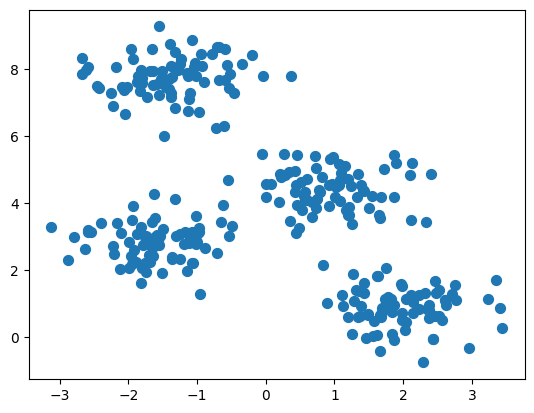

In [3]:
# visualize the data 
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

logging.info('Visualize the data successfully')

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

logging.info('Build and Fit the kmeans Model')

Visualize the results by plotting the data colored by these labels (the following figure).
And also plot the cluster centers as determined by the *k*-means estimator:

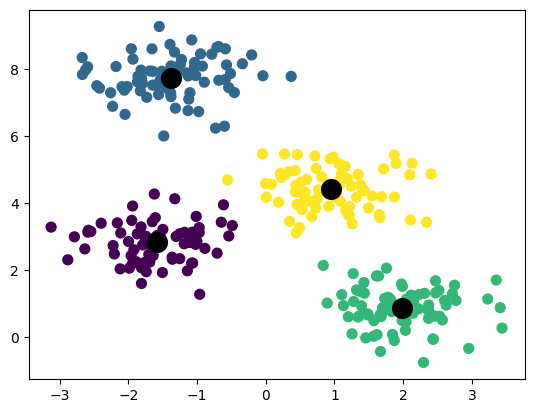

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

logging.info('visualizing kmeans clustering')

## Expectation–Maximization

A powerful algorithm that appears in a number of contexts in data science is expectation–maximization (E–M).
The application of the algorithm that we cover briefly here is *k*-means, which is a particularly simple and easy to understand algorithm.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers.
2. Repeat until converged:
   1. *E-step*: Assign points to the nearest cluster center.
   2. *M-step*: Set the cluster centers to the mean of their assigned points.

In this case, the *E-step* or *expectation step* so refers to the computation of our new expectation of which cluster each point belongs to.
Hence, the *M-step* (or *maximization step*) is maximising some fitness function that defines the locations of the cluster centers (here a simple mean of the data in each cluster).



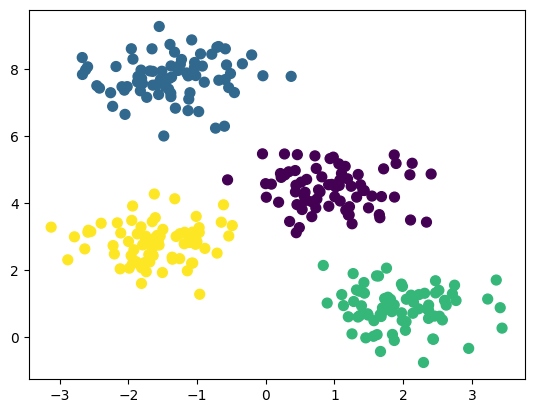

In [6]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

logging.info('visualize the center of clusters')

Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (the number is set by the ``n_init`` parameter, which defaults to 10).

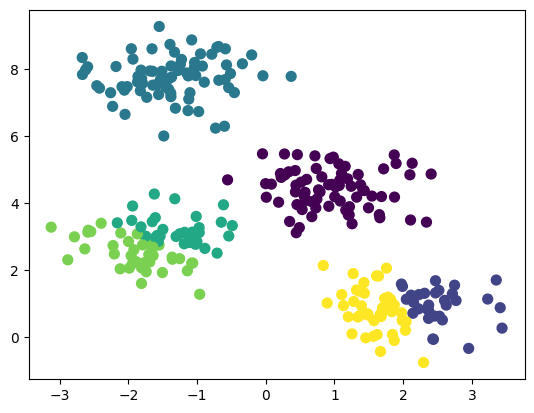

In [7]:
# Visualizing the k-means clustering
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

logging.info('visualize k-means clustering')

#### k-means is limited to linear cluster boundaries
Since the *k*-means fundamental model assumes that points should be closer to their own cluster center than other centers, it will not be effective if the clusters have complex geometries.

In particular, the boundaries of the *k*-means cluster will always be linear and hence it will fail for more complicated boundaries.


In [8]:
# Load the data from sklearn datasets
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

logging.info('loading the make_moons dataset successfully')

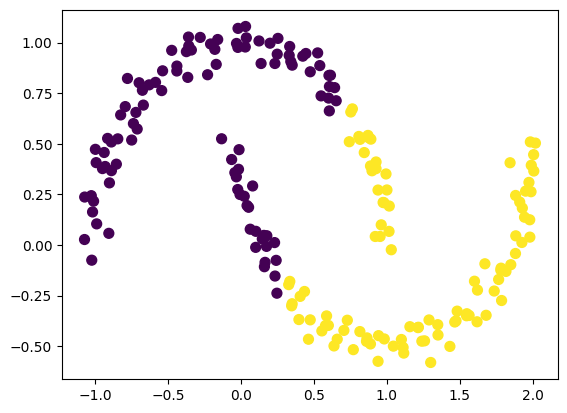

In [15]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


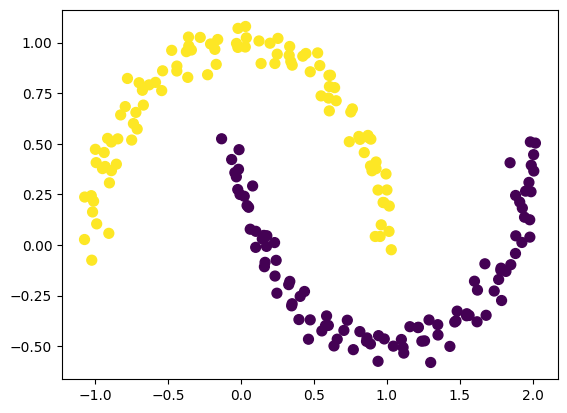

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Define the Spectral Clustering model
# - n_clusters=2: Number of clusters to form
# - affinity='nearest_neighbors': Constructs the affinity matrix using nearest neighbors
# - assign_labels='kmeans': Assigns cluster labels using k-means clustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                           assign_labels='kmeans')

# Fit the model to the data and predict cluster labels
labels = model.fit_predict(X)

# Plot the clustered data points
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

# Display the plot
plt.show()

logging.info('Define and fit the model successfully')

#### k-means can be slow for large numbers of samples
The algorithm is relatively slow because in each iteration of *k*-means must access all points in the dataset.
You may wonder whether it is possible to relax this requirement of using all the data at each iteration, say, by using just a portion of the data to update the cluster centers at each iteration.

This is the idea behind batch-based *k*-means algorithms, one form of which is implemented in `sklearn.cluster.MiniBatchKMeans`.
The interface for this is the same as for standard `KMeans`; we will see an example of its use as we continue our discussion.

## Examples


In [10]:
logging.info('examples for k-means')

### Example 1: k-Means on Digits

We will start by loading the dataset, then find the clusters.
Recall that the digits dataset consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8 × 8 image:

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The clustering can be performed as we did before:

In [18]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can be interpreted as representing the "typical" digit within the cluster.
Let's see what these cluster centers look like (see the following figure):

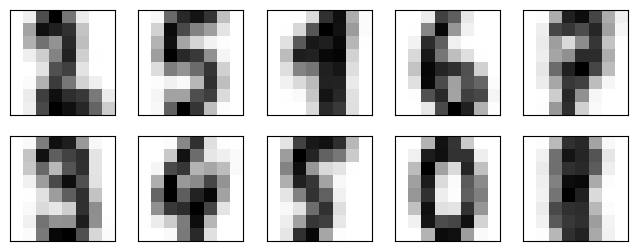

In [19]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [20]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

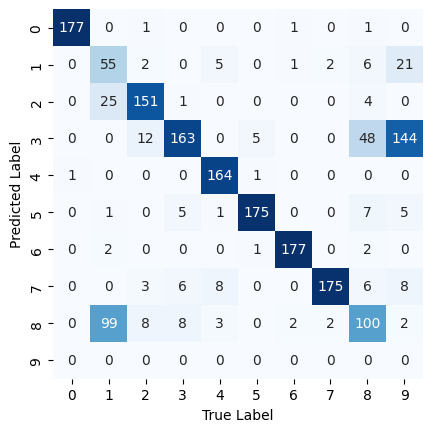

In [22]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix  # For computing the confusion matrix
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt  # For plotting

# Compute the confusion matrix
mat = confusion_matrix(digits.target, labels)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d',  # 'd' formats numbers as integers
            cbar=False, cmap='Blues',  # Use the 'Blues' colormap for better readability
            xticklabels=digits.target_names,  # Set x-axis tick labels as digit names
            yticklabels=digits.target_names)  # Set y-axis tick labels as digit names

# Label the axes
plt.xlabel('True Label')  # X-axis represents actual labels
plt.ylabel('Predicted Label')  # Y-axis represents predicted labels

# Show the plot
plt.show()


In [23]:
# Import necessary libraries
import numpy as np  # For numerical operations
from sklearn.manifold import TSNE  # For dimensionality reduction
from sklearn.cluster import KMeans  # For clustering
from scipy.stats import mode  # For finding the most frequent element
from sklearn.metrics import accuracy_score  # For evaluating accuracy

# Apply t-SNE to reduce the dataset to 2 dimensions
tsne = TSNE(n_components=2, init='random', 
            learning_rate='auto', random_state=0)

# Fit t-SNE and transform the high-dimensional digit data into 2D space
digits_proj = tsne.fit_transform(digits.data)

# Apply K-Means clustering on the 2D projected data
kmeans = KMeans(n_clusters=10, random_state=0)

# Predict cluster labels
clusters = kmeans.fit_predict(digits_proj)

# Permute cluster labels to match the true digit labels
labels = np.zeros_like(clusters)  # Initialize label array with zeros
for i in range(10):
    mask = (clusters == i)  # Identify data points in the current cluster
    labels[mask] = mode(digits.target[mask])[0]  # Assign the most common true label in the cluster

# Compute classification accuracy
accuracy = accuracy_score(digits.target, labels)

# Print the accuracy
print(f"Clustering Accuracy: {accuracy:.4f}")


Clustering Accuracy: 0.9416


### Example 2: k-Means for Color Compression

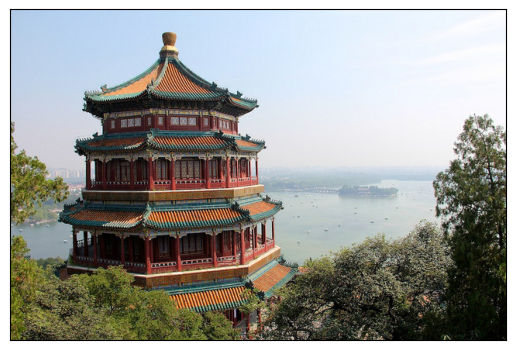

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For visualization
from sklearn.datasets import load_sample_image  # For loading sample images

# Load a sample image ('china.jpg') from scikit-learn's dataset
china = load_sample_image("china.jpg")

# Create a plot without axis ticks
ax = plt.axes(xticks=[], yticks=[])  # Remove x and y ticks for a cleaner display

# Display the image
ax.imshow(china)

# Show the plot
plt.show()


The image itself is stored in a three-dimensional array of size `(height, width, RGB)`.

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.
We will reshape the data to `[n_samples, n_features]` and rescale the colors so that they lie between 0 and 1:

Visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency

In [30]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization

def plot_pixels(data, title, colors=None, N=10000):
    """
    Plots a random subset of pixel values in a 2D color space.

    Parameters:
    - data: numpy array of shape (num_pixels, 3), where each row represents (R, G, B) values.
    - title: str, title for the plot.
    - colors: numpy array of shape (num_pixels, 3), used for coloring the scatter plot points. Defaults to `data`.
    - N: int, number of random pixels to sample for visualization (default: 10,000).
    """
    
    # If no colors are provided, use the data itself for coloring
    if colors is None:
        colors = data
    
    # Choose a random subset of N pixels from the data
    rng = np.random.default_rng(0)  # Initialize a random number generator for reproducibility
    i = rng.permutation(data.shape[0])[:N]  # Shuffle indices and select the first N
    colors = colors[i]  # Select corresponding colors
    R, G, B = data[i].T  # Extract Red, Green, and Blue channels

    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns, figure size 16x6

    # Scatter plot of Red vs. Green
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))  # Set axis labels and limits

    # Scatter plot of Red vs. Blue
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))  # Set axis labels and limits

    # Set the overall title for the figure
    fig.suptitle(title, size=20)
    
# Reshape the image to a 2D array of pixels
data = china / 255.0  # Normalize pixel values
data = data.reshape(-1, 3)  # Reshape to 2D array of RGB values




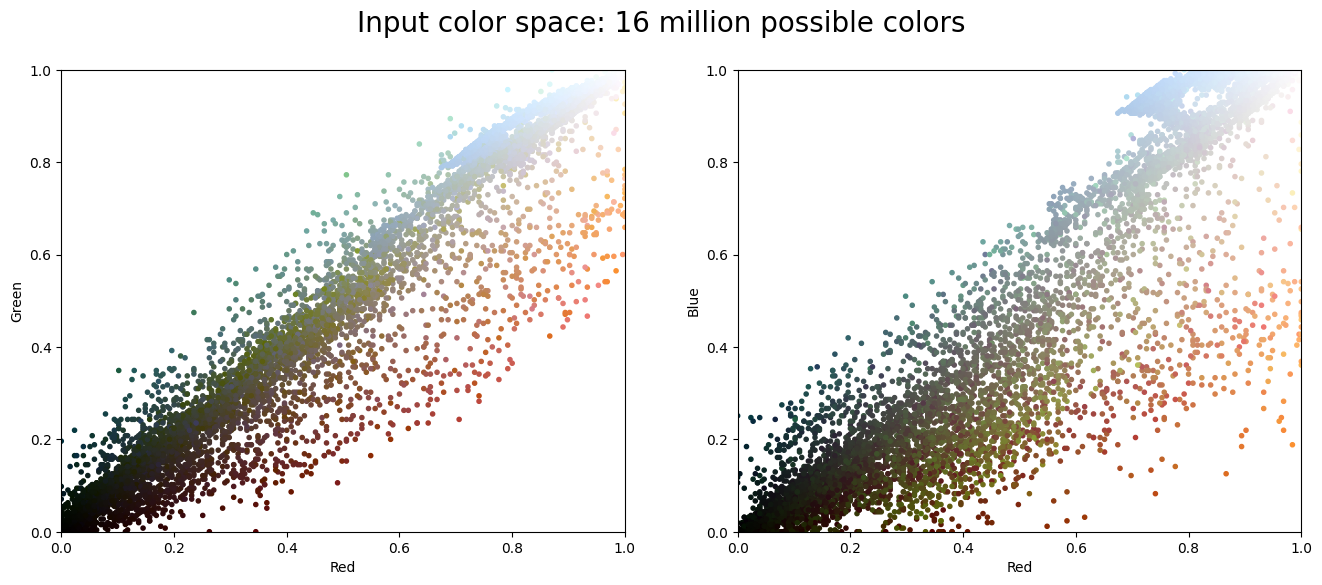

In [31]:
plot_pixels(data, title='Input color space: 16 million possible colors')

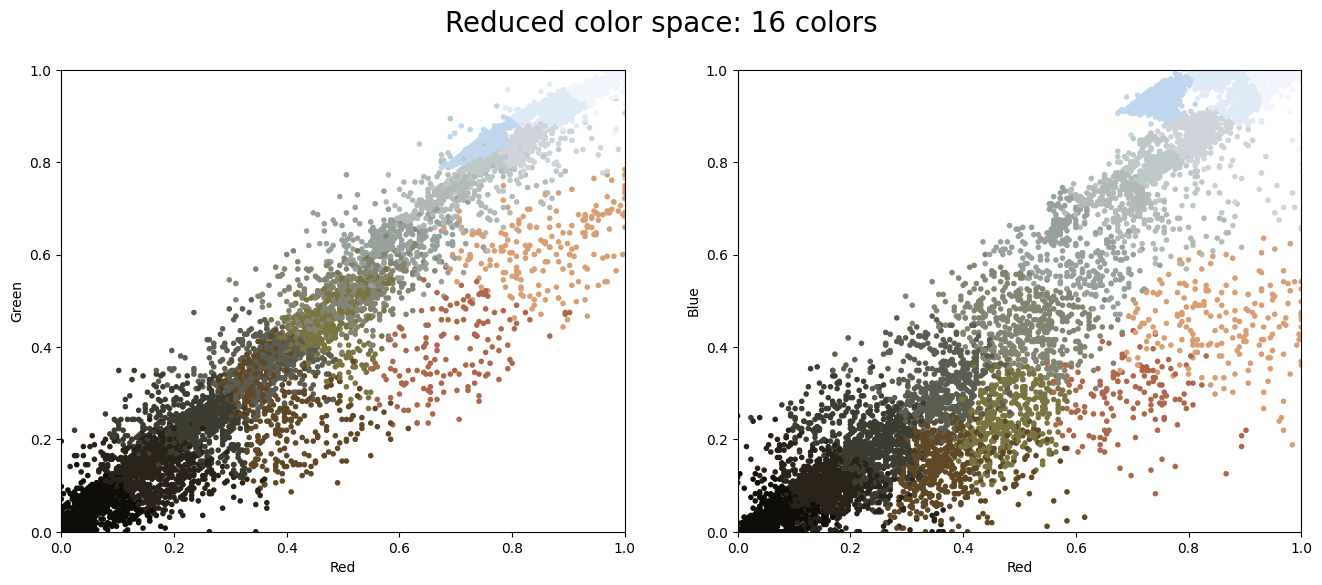

In [32]:
# Import MiniBatchKMeans for efficient k-means clustering
from sklearn.cluster import MiniBatchKMeans  

# Define the number of clusters (16 distinct colors)
kmeans = MiniBatchKMeans(n_clusters=16, random_state=0)  

# Fit the K-Means model on the image data
kmeans.fit(data)  

# Replace each pixel with its nearest cluster center (quantization)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]  

# Plot the color distribution with reduced colors
plot_pixels(data, colors=new_colors,  
            title="Reduced color space: 16 colors")  


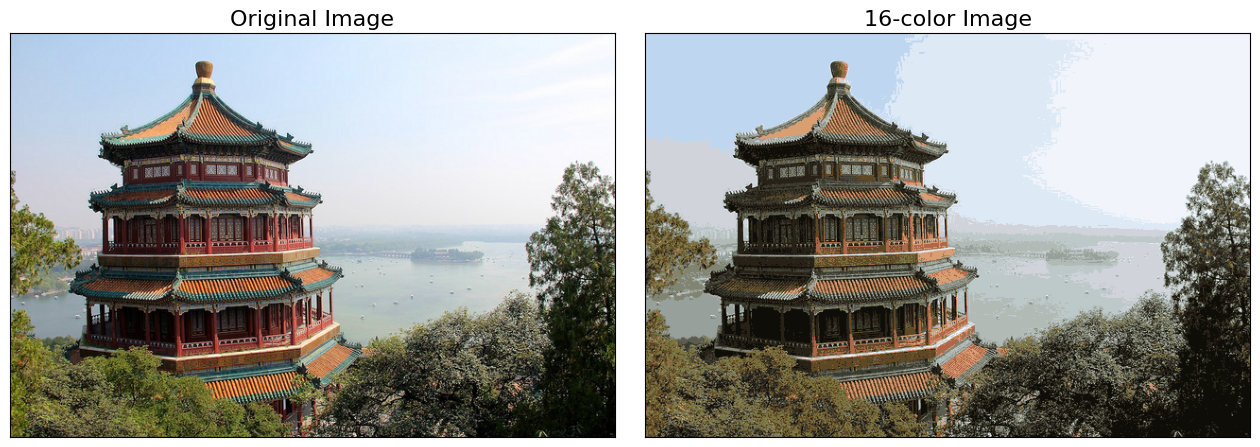

In [33]:
# Reshape the clustered pixel colors back into the original image dimensions
china_recolored = new_colors.reshape(china.shape)  

# Create a figure with two subplots for comparison
fig, ax = plt.subplots(1, 2, figsize=(16, 6),  
                       subplot_kw=dict(xticks=[], yticks=[]))  # Remove axis ticks for a clean look

# Adjust spacing between the subplots
fig.subplots_adjust(wspace=0.05)  

# Display the original image
ax[0].imshow(china)  
ax[0].set_title('Original Image', size=16)  

# Display the recolored (16-color) image
ax[1].imshow(china_recolored)  
ax[1].set_title('16-color Image', size=16)  

# Show the figure
plt.show()


In [11]:
import pandas as pd

# Create a DataFrame from the dataset
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Label'] = y

# Save the DataFrame to an Excel file
df.to_excel('dataset.xlsx', index=False)

logging.info('Dataset saved to Excel file successfully')